In [1]:
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
data=pd.read_csv("dataset.csv")

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 196441 non-null  float64
 1   created_at                197428 non-null  object 
 2   actual_delivery_time      197421 non-null  object 
 3   store_id                  197428 non-null  object 
 4   store_primary_category    192668 non-null  object 
 5   order_protocol            196433 non-null  float64
 6   total_items               197428 non-null  int64  
 7   subtotal                  197428 non-null  int64  
 8   num_distinct_items        197428 non-null  int64  
 9   min_item_price            197428 non-null  int64  
 10  max_item_price            197428 non-null  int64  
 11  total_onshift_partners    181166 non-null  float64
 12  total_busy_partners       181166 non-null  float64
 13  total_outstanding_orders  181166 non-null  f

In [19]:
data.head(4)

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0


In [20]:
data.describe()

,market_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
count,196441.000000,196433.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,181166.000000,181166.000000,181166.000000
mean,2.978706,2.882352,3.196391,2682.331402,2.670791,686.218470,1159.588630,44.808093,41.739747,58.050065
std,1.524867,1.503771,2.666546,1823.093688,1.630255,522.038648,558.411377,34.526783,32.145733,52.661830
min,1.000000,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000
25%,2.000000,1.000000,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000
50%,3.000000,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000
75%,4.000000,4.000000,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000
max,6.000000,7.000000,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000


<AxesSubplot: >

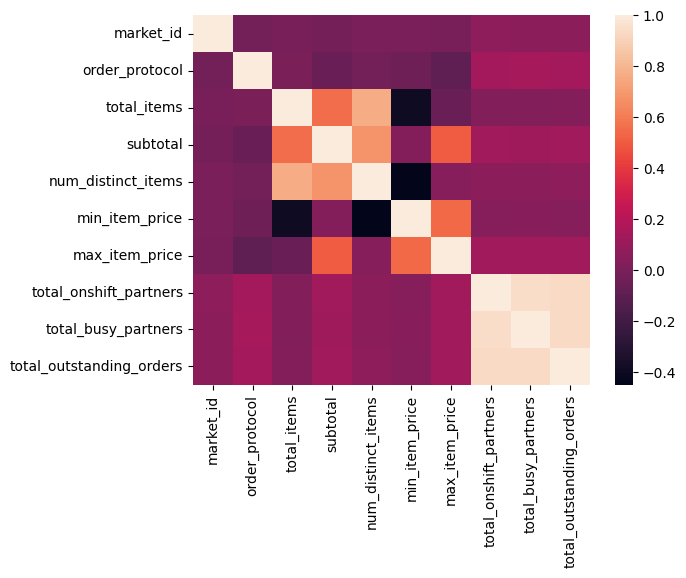

In [21]:
sns.heatmap(data.corr(numeric_only=True))

In [22]:
data.isna().sum()

market_id                     987
created_at                      0
actual_delivery_time            7
store_id                        0
store_primary_category       4760
order_protocol                995
total_items                     0
subtotal                        0
num_distinct_items              0
min_item_price                  0
max_item_price                  0
total_onshift_partners      16262
total_busy_partners         16262
total_outstanding_orders    16262
dtype: int64

# Understanding the features
* market id: integer id for the market where the restaurant lies
* created at: the timestamp at which the order was placed
* actual delivery time: the timestamp when the order was delivered
* store_primary_category: category for the restaurant
* order protocol: integer code value for order protocol(how the order was placed le: through porter, call to restaurant, pre booked, third part etc)
* total items subtotal: final price of the order
* num_distinct items: the number of distinct items in the order
* actual delivery time: the timestamp when the order was delivered
* store_primary_category: category for the restaurant
* order protocol: integer code value for order protocol(how the order was placed le: through porter, call to restaurant, pre booked, third part etc)
* total items subtotal: final price of the order
* num_distinct items: the number of distinct items in the order
* min_item_price: price of the cheapest item in the order
* max_item_price: price of the costliest item in order
* total_onshift_partners: number of delivery partners on duty at the time order was placed
* total_busy_partners: number of delivery partners attending to other tasks
* total outstanding_orders: total number of orders to be fulfilled at the moment

# Data Preprocessing and Cleaning

In [23]:
data=data.dropna(subset=["market_id","order_protocol"])

In [28]:
data["store_primary_category"]=data["store_primary_category"].fillna("Not Specified")

In [32]:
data["store_primary_category"].unique()

array(['american', 'mexican', 'Not Specified', 'indian', 'italian',
       'sandwich', 'thai', 'cafe', 'salad', 'pizza', 'chinese',
       'singaporean', 'burger', 'breakfast', 'mediterranean', 'japanese',
       'greek', 'catering', 'filipino', 'convenience-store', 'other',
       'korean', 'vegan', 'asian', 'barbecue', 'fast', 'dessert',
       'smoothie', 'seafood', 'vietnamese', 'cajun', 'steak',
       'middle-eastern', 'soup', 'vegetarian', 'persian', 'nepalese',
       'sushi', 'latin-american', 'hawaiian', 'chocolate', 'burmese',
       'british', 'pasta', 'alcohol', 'dim-sum', 'peruvian', 'turkish',
       'malaysian', 'ethiopian', 'afghan', 'bubble-tea', 'german',
       'french', 'caribbean', 'gluten-free', 'comfort-food', 'gastropub',
       'pakistani', 'moroccan', 'spanish', 'southern', 'tapas', 'russian',
       'brazilian', 'european', 'cheese', 'african', 'argentine',
       'kosher', 'irish', 'lebanese', 'belgian', 'indonesian',
       'alcohol-plus-food'], dtype=obje

In [34]:
data[data["total_onshift_partners"].isna()]

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
160,6.0,2015-02-06 01:11:56,2015-02-06 01:42:51,45d38ce7f5231602e24a2103a0300ae6,breakfast,2.0,2,575,2,225,350,NaN,NaN,NaN
161,6.0,2015-02-14 02:07:47,2015-02-14 03:17:37,45d38ce7f5231602e24a2103a0300ae6,breakfast,2.0,5,1415,3,185,675,NaN,NaN,NaN
162,6.0,2015-01-31 21:58:30,2015-01-31 22:55:32,45d38ce7f5231602e24a2103a0300ae6,breakfast,2.0,1,650,1,650,650,NaN,NaN,NaN
163,6.0,2015-02-08 03:28:59,2015-02-08 05:32:11,45d38ce7f5231602e24a2103a0300ae6,breakfast,2.0,5,1550,5,225,700,NaN,NaN,NaN
164,6.0,2015-01-23 19:29:17,2015-01-23 20:25:25,45d38ce7f5231602e24a2103a0300ae6,breakfast,2.0,6,1110,5,185,185,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197196,3.0,2015-02-10 19:55:29,2015-02-10 20:33:13,084afd913ab1e6ea58b8ca73f6cb41a6,indian,2.0,3,1792,3,163,1177,NaN,NaN,NaN
197197,3.0,2015-02-06 03:05:38,2015-02-06 03:58:16,084afd913ab1e6ea58b8ca73f6cb41a6,indian,2.0,8,2923,5,50,1199,NaN,NaN,NaN
197198,3.0,2015-01-23 03:57:56,2015-01-23 04:43:17,084afd913ab1e6ea58b8ca73f6cb41a6,indian,2.0,3,3297,3,799,1299,NaN,NaN,NaN
197199,3.0,2015-01-24 03:15:41,2015-01-24 04:04:19,084afd913ab1e6ea58b8ca73f6cb41a6,indian,2.0,4,2776,4,179,1099,NaN,NaN,NaN


* here we will create a feature of how much time it took for delivery .
* Here we will drop delivery time column .
* we will the the hour parameter of order time so we can know that at which time delivery is late or fast.

In [37]:
data["delivery_time"]=(pd.to_datetime(data["actual_delivery_time"])-pd.to_datetime(data["created_at"])).dt.total_seconds()

In [41]:
data["created_at"]=pd.to_datetime(data["created_at"]).dt.hour

<AxesSubplot: >

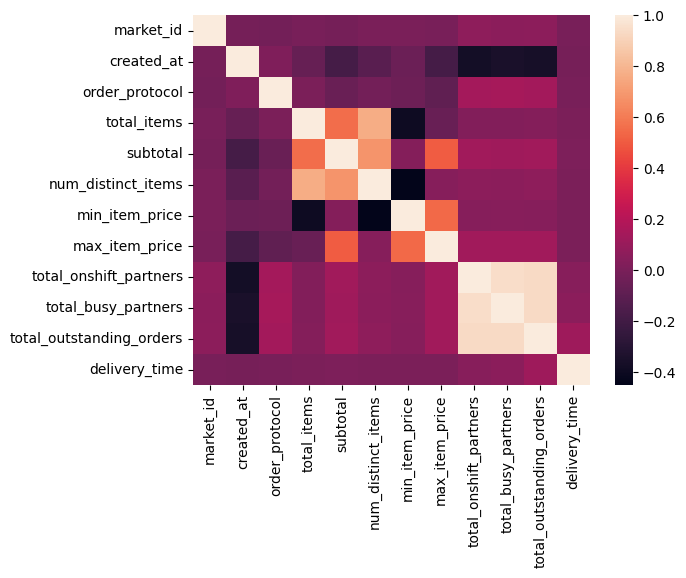

In [43]:
sns.heatmap(data.corr(numeric_only=True))

* Droping the unnecessary features

In [46]:
data=data.drop(["actual_delivery_time","max_item_price","min_item_price","store_id"],axis=1)

In [49]:
data[data["total_busy_partners"].isna()]

,market_id,created_at,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,total_onshift_partners,total_busy_partners,total_outstanding_orders,delivery_time
160,6.0,1,45d38ce7f5231602e24a2103a0300ae6,breakfast,2.0,2,575,2,NaN,NaN,NaN,1855.0
161,6.0,2,45d38ce7f5231602e24a2103a0300ae6,breakfast,2.0,5,1415,3,NaN,NaN,NaN,4190.0
162,6.0,21,45d38ce7f5231602e24a2103a0300ae6,breakfast,2.0,1,650,1,NaN,NaN,NaN,3422.0
163,6.0,3,45d38ce7f5231602e24a2103a0300ae6,breakfast,2.0,5,1550,5,NaN,NaN,NaN,7392.0
164,6.0,19,45d38ce7f5231602e24a2103a0300ae6,breakfast,2.0,6,1110,5,NaN,NaN,NaN,3368.0
...,...,...,...,...,...,...,...,...,...,...,...,...
197196,3.0,19,084afd913ab1e6ea58b8ca73f6cb41a6,indian,2.0,3,1792,3,NaN,NaN,NaN,2264.0
197197,3.0,3,084afd913ab1e6ea58b8ca73f6cb41a6,indian,2.0,8,2923,5,NaN,NaN,NaN,3158.0
197198,3.0,3,084afd913ab1e6ea58b8ca73f6cb41a6,indian,2.0,3,3297,3,NaN,NaN,NaN,2721.0
197199,3.0,3,084afd913ab1e6ea58b8ca73f6cb41a6,indian,2.0,4,2776,4,NaN,NaN,NaN,2918.0
